In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def get_vessel_type_from_full_path(path):
    res = get_vessel_type(path.split("/")[-1])
    if not res:
        res = get_vessel_type(path.split("/")[-2])
    return res

def get_vessel_type(name):
    if "cancer" in name.lower():
        return "Cancer"
    if "artery" in name.lower():
        return "Artery"
    if "vein" in name.lower():
        return "Vein"
    if "isv" in name.lower():
        return "ISV"
    return False

In [3]:
parent = Path("/media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/")
vessels = sorted({p.parent for p in parent.glob("**/*red ch_*.ims")})
data = []
for vessel in tqdm(vessels):
    try:
        data.append(pd.read_csv(vessel / "median_results.csv"))
        data[-1]["File"] = str(vessel).split("organised/7 DAY OLD Fish ")[1]
    except FileNotFoundError:
        print("No data for", vessel, flush=True)

  0%|                                                                                       | 0/111 [00:00<?, ?it/s]

No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 1 complete/Cancer region/Cancer vessel 1
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 1 complete/Caudal vein
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 1 complete/Intersegmental vessels/ISV1
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 1 complete/Intersegmental vessels/ISV2
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 1 complete/Intersegmental vessels/ISV3
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 2/Tumor vessels/Cancer vessel 1
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish with tumors/Fish 2/Tumor vessels/Cancer vessel 10
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD 

 50%|██████████████████████████████████████▏                                      | 55/111 [00:00<00:00, 538.39it/s]

No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 3/vein/1000
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 3/vein/400
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 4/Vein/1000
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 4/Vein/400
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 5
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 6
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 7
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 9/ISV 2/1000
No data for /media/yngve/TOSHIBA EXT (YNGVE)/fish_data/organised/7 DAY OLD Fish without tumors/Fish 9/ISV 2/400


100%|████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 473.78it/s]


In [4]:
results = pd.concat(data)
results["With tumour"] = results["File"].map(lambda x: "with " in x)

In [5]:
results["Vessel type"] = results["File"].map(get_vessel_type_from_full_path)

<Figure size 1600x900 with 0 Axes>

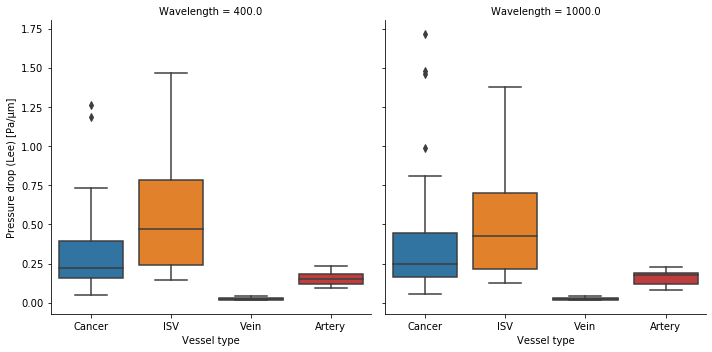

In [13]:
plt.figure(figsize=(8, 4.5), dpi=200)
sns.catplot(x="Vessel type", y="Pressure drop (Lee) [Pa/µm]", col="Wavelength", data=results, kind="box")

<Figure size 1600x900 with 0 Axes>

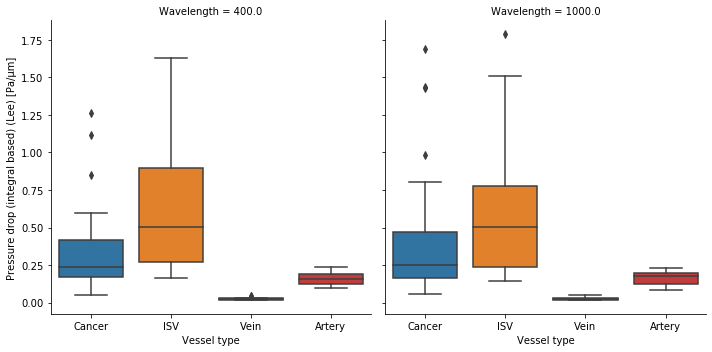

In [17]:
plt.figure(figsize=(8, 4.5), dpi=200)
sns.catplot(x="Vessel type", y="Pressure drop (integral based) (Lee) [Pa/µm]", col="Wavelength", data=results, kind="box")

<Figure size 1600x900 with 0 Axes>

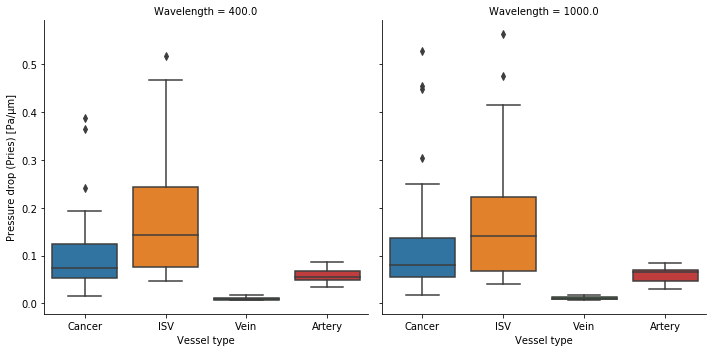

In [14]:
plt.figure(figsize=(8, 4.5), dpi=200)
sns.catplot(x="Vessel type", y="Pressure drop (Pries) [Pa/µm]", col="Wavelength", data=results, kind="box")

<Figure size 1600x900 with 0 Axes>

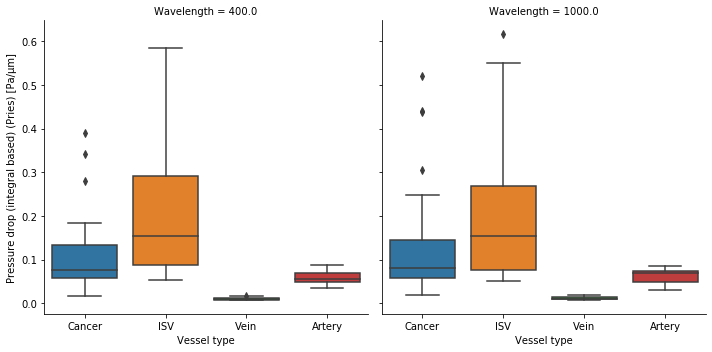

In [18]:
plt.figure(figsize=(8, 4.5), dpi=200)
sns.catplot(x="Vessel type", y="Pressure drop (integral based) (Pries) [Pa/µm]", col="Wavelength", data=results, kind="box")

In [16]:
results.groupby(["Vessel type", "Wavelength"]).median()[[
    'v [µm/s]',
    'Distance to centerline [µm]',
    'Max R [µm]',
    "Pressure drop (Lee) [Pa/µm]",
    "Pressure drop (Pries) [Pa/µm]",
    "Pressure drop (integral based) (Lee) [Pa/µm]",
    "Pressure drop (integral based) (Pries) [Pa/µm]"
]]

v [µm/s]  Distance to centerline [µm]  Max R [µm]  \
Vessel type Wavelength                                                        
Artery      400.0       486.509745                     3.600660    8.241000   
            1000.0      504.676206                     3.444657    7.738500   
Cancer      400.0       267.369246                     1.620514    4.832368   
            1000.0      259.704351                     1.634375    4.832368   
ISV         400.0       242.651515                     1.420852    3.411083   
            1000.0      241.383397                     1.333960    3.486406   
Vein        400.0       183.155222                     4.041948   12.693273   
            1000.0      229.797579                     4.489647   12.693273   

                        Pressure drop (Lee) [Pa/µm]  \
Vessel type Wavelength                                
Artery      400.0                          0.153971   
            1000.0                         0.178876   
Cancer      400.0                          0.218760   
            1000.0                         0.249135   
ISV         400.0                          0.467946   
            1000.0                         0.425801   
Vein        400.0                          0.022818   
            1000.0                         0.023459   

                        Pressure drop (Pries) [Pa/µm]  \
Vessel type Wavelength                                  
Artery      400.0                            0.054656   
            1000.0                           0.065171   
Cancer      400.0                            0.073617   
            1000.0                           0.080513   
ISV         400.0                            0.143319   
            1000.0                           0.141487   
Vein        400.0                            0.009348   
            1000.0                           0.009611   

                        Pressure drop (integral based) (Lee) [Pa/µm]  \
Vessel type Wavelength                                                 
Artery      400.0                                           0.159300   
            1000.0                                          0.180114   
Cancer      400.0                                           0.239446   
            1000.0                                          0.253394   
ISV         400.0                                           0.504711   
            1000.0                                          0.500796   
Vein        400.0                                           0.024204   
            1000.0                                          0.025718   

                        Pressure drop (integral based) (Pries) [Pa/µm]  
Vessel type Wavelength                                                  
Artery      400.0                                             0.056548  
            1000.0                                            0.068356  
Cancer      400.0                                             0.076033  
            1000.0                                            0.081464  
ISV         400.0                                             0.154712  
            1000.0                                            0.153747  
Vein        400.0                                             0.009916  
            1000.0                                            0.010536